# CS 316 : Introduction to Deep Learning - Fall 2024
## Lab 08 : Initialization and Tarde Off
### Dr. Abdul Samad

# Instructions

1. Make a copy of this notebook on google colab at start of the lab.

2. Please rename your notebook as *Lab_8_aa1234.ipynb* before starting the lab. Notebooks which do not follow appropriate naming convention will not be graded.

3. You have to submit this lab during the lab timings. You are allowed to submit till 11:59 PM on the day of your lab with a 30% penalty. No submissions will be accepted afterwards.

4. Use of AI is strictly prohibited. Anyone caught using Any AI tool during lab or while grading will be immediately reported to OCVS without any further discussion.

5. At the end of the lab, download the notebook (ipynb extension file) and upload it on canvas as a file. Submitting link to notebook or any other file will not be accepted.

6. Each task has points assigned to it. Total Lab is of 100 points.

7. Use of for loops is strictly prohibited.

8. For every theoretical question, there is a separate cell given at the end. You have to write your answer there.

9. If you have any questions, please feel free to reach out to the course instructor or RA.

## Task Overview


In this lab we will first look at how initialization of hyperparamters affects the output of the model. Then we will look at Bias-Variance Trade Off. This Lab is going to be short. Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Let's start with importing Libraries first

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import math

# **Initialization**





First let's define a neural network.  We'll just choose the weights and biases randomly for now

In [104]:
def init_params(K, D, sigma_sq_omega):
  # Set seed so we always get the same random numbers
  np.random.seed(0)

  # Input layer
  D_i = 1
  # Output layer
  D_o = 1

  # Make empty lists
  all_weights = [None] * (K+1)
  all_biases = [None] * (K+1)

  # Create input and output layers
  all_weights[0] = np.random.normal(size=(D, D_i))*np.sqrt(sigma_sq_omega)
  all_weights[-1] = np.random.normal(size=(D_o, D)) * np.sqrt(sigma_sq_omega)
  all_biases[0] = np.zeros((D,1))
  all_biases[-1]= np.zeros((D_o,1))

  # Create intermediate layers
  for layer in range(1,K):
    all_weights[layer] = np.random.normal(size=(D,D))*np.sqrt(sigma_sq_omega)
    all_biases[layer] = np.zeros((D,1))

  return all_weights, all_biases

In [105]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [106]:
def compute_network_output(net_input, all_weights, all_biases):

  # Retrieve number of layers
  K = len(all_weights)-1

  # We'll store the pre-activations at each layer in a list "all_f"
  # and the activations in a second list "all_h".
  all_f = [None] * (K+1)
  all_h = [None] * (K+1)

  #For convenience, we'll set
  # all_h[0] to be the input, and all_f[K] will be the output
  all_h[0] = net_input

  # Run through the layers, calculating all_f[0...K-1] and all_h[1...K]
  for layer in range(K):
      # Update preactivations and activations at this layer according to eqn 7.5
      all_f[layer] = all_biases[layer] + np.matmul(all_weights[layer], all_h[layer])
      all_h[layer+1] = ReLU(all_f[layer])

  # Compute the output from the last hidden layer
  all_f[K] = all_biases[K] + np.matmul(all_weights[K], all_h[K])

  # Retrieve the output
  net_output = all_f[K]

  return net_output, all_f, all_h

Now let's investigate how the size of the outputs vary as we change the initialization variance:


In [107]:
# Number of layers
K = 5
# Number of neurons per layer
D = 8
# Input layer
D_i = 1
# Output layer
D_o = 1
# Set variance of initial weights to 1
sigma_sq_omega = 1.0
# Initialize parameters
all_weights, all_biases = init_params(K,D,sigma_sq_omega)

n_data = 1000
data_in = np.random.normal(size=(1,n_data))
net_output, all_f, all_h = compute_network_output(data_in, all_weights, all_biases)

for layer in range(1,K+1):
  print("Layer %d, std of hidden units = %3.3f"%(layer, np.std(all_h[layer])))

Layer 1, std of hidden units = 0.811
Layer 2, std of hidden units = 1.472
Layer 3, std of hidden units = 4.547
Layer 4, std of hidden units = 8.896
Layer 5, std of hidden units = 10.106


# Q1: TODO [20 Points]

You can see that the values of the hidden units are increasing on average (the variance is across all hidden units at the layer and the 1000 training examples).

Change this to 50 layers with 80 hidden units per layer.
Then experiment with sigma_sq_omega to try to stop the variance of the forward computation exploding.



In [108]:
# TODO
# Do your experimentation in this tab only

# Number of layers
K = 50
# Number of neurons per layer
D = 80
# Input layer
D_i = 1
# Output layer
D_o = 1
# Set variance of initial weights to 1
sigma_sq_omega = 0.025
# Initialize parameters
all_weights, all_biases = init_params(K,D,sigma_sq_omega)

n_data = 1000
data_in = np.random.normal(size=(1,n_data))
net_output, all_f, all_h = compute_network_output(data_in, all_weights, all_biases)

for layer in range(1,K+1):
  print("Layer %d, std of hidden units = %3.3f"%(layer, np.std(all_h[layer])))

# END TODO

Layer 1, std of hidden units = 0.098
Layer 2, std of hidden units = 0.078
Layer 3, std of hidden units = 0.083
Layer 4, std of hidden units = 0.101
Layer 5, std of hidden units = 0.111
Layer 6, std of hidden units = 0.099
Layer 7, std of hidden units = 0.092
Layer 8, std of hidden units = 0.095
Layer 9, std of hidden units = 0.083
Layer 10, std of hidden units = 0.072
Layer 11, std of hidden units = 0.076
Layer 12, std of hidden units = 0.067
Layer 13, std of hidden units = 0.065
Layer 14, std of hidden units = 0.065
Layer 15, std of hidden units = 0.064
Layer 16, std of hidden units = 0.066
Layer 17, std of hidden units = 0.070
Layer 18, std of hidden units = 0.075
Layer 19, std of hidden units = 0.073
Layer 20, std of hidden units = 0.095
Layer 21, std of hidden units = 0.080
Layer 22, std of hidden units = 0.081
Layer 23, std of hidden units = 0.085
Layer 24, std of hidden units = 0.097
Layer 25, std of hidden units = 0.106
Layer 26, std of hidden units = 0.101
Layer 27, std of hidd

Now let's define a loss function.  We'll just use the least squares loss function. We'll also write a function to compute dloss_doutput


In [109]:
def least_squares_loss(net_output, y):
  return np.sum((net_output-y) * (net_output-y))

def d_loss_d_output(net_output, y):
    return 2*(net_output -y);

Here's the code for the backward pass

In [110]:
# We'll need the indicator function
def indicator_function(x):
  x_in = np.array(x)
  x_in[x_in>=0] = 1
  x_in[x_in<0] = 0
  return x_in

# Main backward pass routine
def backward_pass(all_weights, all_biases, all_f, all_h, y):
  # Retrieve number of layers
  K = len(all_weights) - 1

  # We'll store the derivatives dl_dweights and dl_dbiases in lists as well
  all_dl_dweights = [None] * (K+1)
  all_dl_dbiases = [None] * (K+1)
  # And we'll store the derivatives of the loss with respect to the activation and preactivations in lists
  all_dl_df = [None] * (K+1)
  all_dl_dh = [None] * (K+1)
  # Again for convenience we'll stick with the convention that all_h[0] is the net input and all_f[k] in the net output

  # Compute derivatives of net output with respect to loss
  all_dl_df[K] = np.array(d_loss_d_output(all_f[K],y))

  # Now work backwards through the network
  for layer in range(K,-1,-1):
    # Calculate the derivatives of biases at layer from all_dl_df[K]. (eq 7.13, line 1)
    all_dl_dbiases[layer] = np.array(all_dl_df[layer])
    # Calculate the derivatives of weight at layer from all_dl_df[K] and all_h[K] (eq 7.13, line 2)
    all_dl_dweights[layer] = np.matmul(all_dl_df[layer], all_h[layer].transpose())

    # Calculate the derivatives of activations from weight and derivatives of next preactivations (eq 7.13, line 3 second part)
    all_dl_dh[layer] = np.matmul(all_weights[layer].transpose(), all_dl_df[layer])
    # Calculate the derivatives of the pre-activation f with respect to activation h (eq 7.13, line 3, first part)
    if layer > 0:
      all_dl_df[layer-1] = indicator_function(all_f[layer-1]) * all_dl_dh[layer]

  return all_dl_dweights, all_dl_dbiases, all_dl_dh, all_dl_df

Now let's look at what happens to the magnitude of the gradients on the way back.

In [111]:
# Number of layers
K = 5
# Number of neurons per layer
D = 8
# Input layer
D_i = 1
# Output layer
D_o = 1
# Set variance of initial weights to 1
sigma_sq_omega = 1.0
# Initialize parameters
all_weights, all_biases = init_params(K,D,sigma_sq_omega)

# For simplicity we'll just consider the gradients of the weights and biases between the first and last hidden layer
n_data = 100
aggregate_dl_df = [None] * (K+1)
for layer in range(1,K):
  # These 3D arrays will store the gradients for every data point
  aggregate_dl_df[layer] = np.zeros((D,n_data))


# We'll have to compute the derivatives of the parameters for each data point separately
for c_data in range(n_data):
  data_in = np.random.normal(size=(1,1))
  y = np.zeros((1,1))
  net_output, all_f, all_h = compute_network_output(data_in, all_weights, all_biases)
  all_dl_dweights, all_dl_dbiases, all_dl_dh, all_dl_df = backward_pass(all_weights, all_biases, all_f, all_h, y)
  for layer in range(1,K):
    aggregate_dl_df[layer][:,c_data] = np.squeeze(all_dl_df[layer])

for layer in range(1,K):
  print("Layer %d, std of dl_dh = %3.3f"%(layer, np.std(aggregate_dl_df[layer].ravel())))


Layer 1, std of dl_dh = 446.654
Layer 2, std of dl_dh = 340.657
Layer 3, std of dl_dh = 109.132
Layer 4, std of dl_dh = 56.472


# Q2: TODO [20 Points]

You can see that the gradients of the hidden units are increasing on average (the standard deviation is across all hidden units at the layer and the 100 training examples ).

Change this to 50 layers with 80 hidden units per layer.
Then experiment with sigma_sq_omega to try to stop the variance of the gradients.


In [112]:
# TODO
# Do your experimentation in this tab only

# Number of layers
K = 50
# Number of neurons per layer
D = 80
# Input layer
D_i = 1
# Output layer
D_o = 1
# Set variance of initial weights to 1
sigma_sq_omega = 0.025
# Initialize parameters
all_weights, all_biases = init_params(K,D,sigma_sq_omega)

# For simplicity we'll just consider the gradients of the weights and biases between the first and last hidden layer
n_data = 100
aggregate_dl_df = [None] * (K+1)
for layer in range(1,K):
  # These 3D arrays will store the gradients for every data point
  aggregate_dl_df[layer] = np.zeros((D,n_data))


# We'll have to compute the derivatives of the parameters for each data point separately
for c_data in range(n_data):
  data_in = np.random.normal(size=(1,1))
  y = np.zeros((1,1))
  net_output, all_f, all_h = compute_network_output(data_in, all_weights, all_biases)
  all_dl_dweights, all_dl_dbiases, all_dl_dh, all_dl_df = backward_pass(all_weights, all_biases, all_f, all_h, y)
  for layer in range(1,K):
    aggregate_dl_df[layer][:,c_data] = np.squeeze(all_dl_df[layer])

for layer in range(1,K):
  print("Layer %d, std of dl_dh = %3.3f"%(layer, np.std(aggregate_dl_df[layer].ravel())))













# END TODO

Layer 1, std of dl_dh = 0.030
Layer 2, std of dl_dh = 0.032
Layer 3, std of dl_dh = 0.037
Layer 4, std of dl_dh = 0.036
Layer 5, std of dl_dh = 0.034
Layer 6, std of dl_dh = 0.035
Layer 7, std of dl_dh = 0.036
Layer 8, std of dl_dh = 0.033
Layer 9, std of dl_dh = 0.033
Layer 10, std of dl_dh = 0.037
Layer 11, std of dl_dh = 0.038
Layer 12, std of dl_dh = 0.038
Layer 13, std of dl_dh = 0.035
Layer 14, std of dl_dh = 0.036
Layer 15, std of dl_dh = 0.038
Layer 16, std of dl_dh = 0.035
Layer 17, std of dl_dh = 0.030
Layer 18, std of dl_dh = 0.030
Layer 19, std of dl_dh = 0.027
Layer 20, std of dl_dh = 0.033
Layer 21, std of dl_dh = 0.030
Layer 22, std of dl_dh = 0.027
Layer 23, std of dl_dh = 0.028
Layer 24, std of dl_dh = 0.024
Layer 25, std of dl_dh = 0.025
Layer 26, std of dl_dh = 0.035
Layer 27, std of dl_dh = 0.029
Layer 28, std of dl_dh = 0.032
Layer 29, std of dl_dh = 0.035
Layer 30, std of dl_dh = 0.037
Layer 31, std of dl_dh = 0.038
Layer 32, std of dl_dh = 0.037
Layer 33, std of 

# **Bias-Variance Trade-Off**


There are three possible sources of error, which are known as noise, bias, and variance respectively.
For a fixed-size training dataset, the variance term typically increases as the model capacity increases (by model capacity it means hyperparamters i.e. number of layers and hidden units). Consequently, increasing the model capacity does not necessarily reduce the test error. This is known as the bias-variance trade-off.


In [113]:
# The true function that we are trying to estimate, defined on [0,1]
def true_function(x):
    y = np.exp(np.sin(x*(2*3.1413)))
    return y

In [114]:
# Generate some data points with or without noise
def generate_data(n_data, sigma_y=0.3):
    # Generate x values quasi uniformly
    x = np.ones(n_data)
    for i in range(n_data):
        x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)

    # y value from running through function and adding noise
    y = np.ones(n_data)
    for i in range(n_data):
        y[i] = true_function(x[i])
        y[i] += np.random.normal(0, sigma_y, 1)
    return x,y


In [115]:
# Draw the fitted function, together with uncertainty used to generate points
def plot_function(x_func, y_func, x_data=None,y_data=None, x_model = None, y_model =None, sigma_func = None, sigma_model=None):

    fig,ax = plt.subplots()
    ax.plot(x_func, y_func, 'k-')
    if sigma_func is not None:
      ax.fill_between(x_func, y_func-2*sigma_func, y_func+2*sigma_func, color='lightgray')

    if x_data is not None:
        ax.plot(x_data, y_data, 'o', color='#d18362')

    if x_model is not None:
        ax.plot(x_model, y_model, '-', color='#7fe7de')

    if sigma_model is not None:
      ax.fill_between(x_model, y_model-2*sigma_model, y_model+2*sigma_model, color='lightgray')

    ax.set_xlim(0,1)
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    plt.show()

<ipython-input-114-b3db42db138e>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)
<ipython-input-114-b3db42db138e>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] += np.random.normal(0, sigma_y, 1)


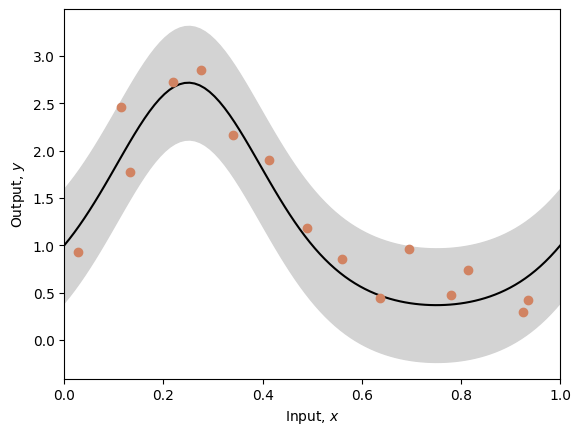

In [116]:
# Generate true function
x_func = np.linspace(0, 1.0, 100)
y_func = true_function(x_func);

# Generate some data points
np.random.seed(1)
sigma_func = 0.3
n_data = 15
x_data,y_data = generate_data(n_data, sigma_func)

# Plot the functinon, data and uncertainty
plot_function(x_func, y_func, x_data, y_data, sigma_func=sigma_func)

This figure will be used for below given cell.
<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1PJ1H3N5oVqVMs457dof7OBRH3mVUanUM)
Figure: 1
</center>

In [117]:
# Define model -- beta is a scalar and omega has size n_hidden,1
def network(x, beta, omega):
    # Retrieve number of hidden units
    n_hidden = omega.shape[0]

    y = np.zeros_like(x)
    for c_hidden in range(n_hidden):
        # Evaluate activations based on shifted lines (figure 1, b-d)
        line_vals =  x  - c_hidden/n_hidden
        h =  line_vals * (line_vals > 0)
        # Weight activations by omega parameters and sum
        y = y + omega[c_hidden] * h
    # Add bias, beta
    y = y + beta

    return y

Below given function gives you best possible parameters for beta and omega. hence, you can assume that your model is already trained well. You can utlize time outside the lab to figure out how it is doing that. Maybe some of the functions used here can help you later.

In [118]:
# This fits the n_hidden+1 parameters (see figure 1) in closed form.
# If you have studied linear algebra, then you will know it is a least
# squares solution of the form (A^TA)^-1A^Tb.  If you don't recognize that,
# then just take it on trust that this gives you the best possible solution.
def fit_model_closed_form(x,y,n_hidden):
  n_data = len(x)
  A = np.ones((n_data, n_hidden+1))
  for i in range(n_data):
      for j in range(1,n_hidden+1):
          A[i,j] = x[i]-(j-1)/n_hidden
          if A[i,j] < 0:
              A[i,j] = 0;

  beta_omega = np.linalg.lstsq(A, y, rcond=None)[0]

  beta = beta_omega[0]
  omega = beta_omega[1:]

  return beta, omega


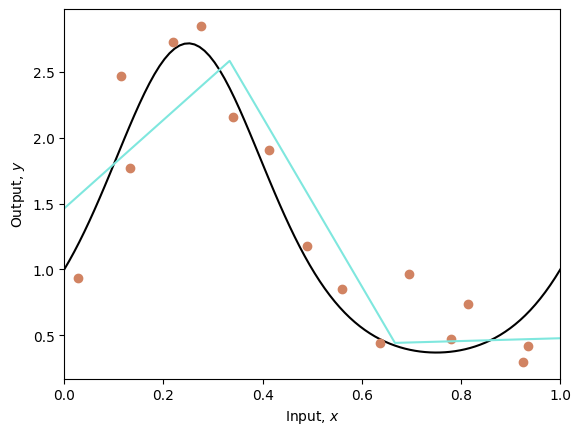

In [119]:
# Closed form solution
beta, omega = fit_model_closed_form(x_data,y_data,n_hidden=3)

# Get prediction for model across graph range
x_model = np.linspace(0,1,100);
y_model = network(x_model, beta, omega)

# Draw the function and the model
plot_function(x_func, y_func, x_data,y_data, x_model, y_model)

# Q3: TODO [30 Points]
In the function given below, complete the code by following these steps.

    Generate  x_data,y_data pairs using generate data function with standard deviation sigma_func and n_data
    Fit the model using fit_model_closed_form function
    Run the fitted model on x_model and store it in y_model variable


In [120]:
# Run the model many times with different datasets and return the mean and variance
def get_model_mean_variance(n_data, n_datasets, n_hidden, sigma_func):

  # Create array that stores model results in rows
  y_model_all = np.zeros((n_datasets, x_model.shape[0]))

  for c_dataset in range(n_datasets):
    # TODO

    x_data,y_data = generate_data(n_data, sigma_func)

    beta, omega = fit_model_closed_form(x_data,y_data,n_hidden)

    y_model = network(x_model, beta, omega)






    # END TODO

    # Store the model results
    y_model_all[c_dataset,:] = y_model

  # Get mean and standard deviation of model
  mean_model = np.mean(y_model_all,axis=0)
  std_model = np.std(y_model_all,axis=0)

  # Return the mean and standard deviation of the fitted model
  return mean_model, std_model

<ipython-input-114-b3db42db138e>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)
<ipython-input-114-b3db42db138e>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] += np.random.normal(0, sigma_y, 1)


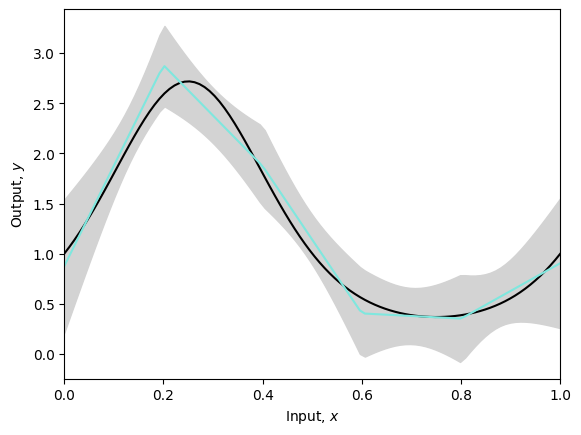

In [121]:
# Let's generate N random data sets, fit the model N times and look the mean and variance
n_datasets = 100
n_data = 15
sigma_func = 0.3
n_hidden = 5

# Get mean and variance of fitted model
np.random.seed(1)
# Based on the parameters given, this function will generate 100 datasets where each dataset will have 15
# data points and 5 hidden units. It then returns mean of those models and std deviation as well.
mean_model, std_model = get_model_mean_variance(n_data, n_datasets, n_hidden, sigma_func) ;

# Plot the results
plot_function(x_func, y_func, x_model=x_model, y_model=mean_model, sigma_model=std_model)

If code for previous task is correct then your graph will look like this.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1sdNTO_zf24_-Md6agqD7zN6umorsoPD6)
Figure: 1

</center>


# Q4: TODO [10 Points]
Experiment with changing the number of data points and the number of hidden variables in the model.  Get a feeling for what happens in terms of the bias (squared deviation between cyan and black lines) and the variance (gray region) as we manipulate these quantities.

<ipython-input-114-b3db42db138e>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)
<ipython-input-114-b3db42db138e>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] += np.random.normal(0, sigma_y, 1)


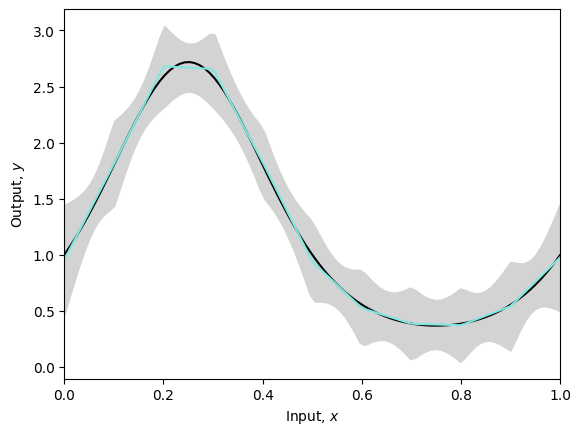

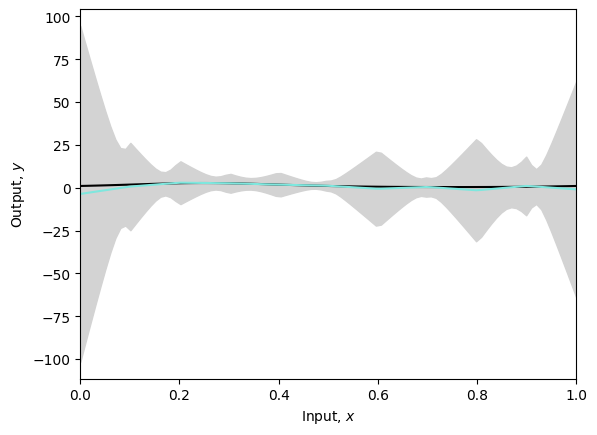

In [122]:
# TODO


# Let's generate N random data sets, fit the model N times and look the mean and variance
n_datasets = 100
n_data = 50
sigma_func = 0.3
n_hidden = 10


# Get mean and variance of fitted model
np.random.seed(1)
# Based on the parameters given, this function will generate 100 datasets where each dataset will have 15
# data points and 5 hidden units. It then returns mean of those models and std deviation as well.
mean_model, std_model = get_model_mean_variance(n_data, n_datasets, n_hidden, sigma_func) ;

# Plot the results
plot_function(x_func, y_func, x_model=x_model, y_model=mean_model, sigma_model=std_model)


# Do your experimentation in this tab only

n_datasets = 100
n_data = 10
sigma_func = 0.3
n_hidden = 10


# Get mean and variance of fitted model
np.random.seed(1)
# Based on the parameters given, this function will generate 100 datasets where each dataset will have 15
# data points and 5 hidden units. It then returns mean of those models and std deviation as well.
mean_model, std_model = get_model_mean_variance(n_data, n_datasets, n_hidden, sigma_func) ;

# Plot the results
plot_function(x_func, y_func, x_model=x_model, y_model=mean_model, sigma_model=std_model)


# The variance gets increased if we increase the data points and hidden layerrs. The bias remains the same.
# The variance gets very less if we increase the data points a lot and hidden layers only a little.



# END TODO

# Q5: TODO [20 Points]
In the function given below, complete the code by Estimating bias and variance.

    Compute variance by taking average of the model variance (as variance = std^2, we will take square of standard deviation).
    Compute bias by taking average squared deviation of mean fitted model around true function (true function's output is
    stored in y_func variable. deviation here simply means how much it is far away from the other values).

<ipython-input-114-b3db42db138e>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)
<ipython-input-114-b3db42db138e>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] += np.random.normal(0, sigma_y, 1)


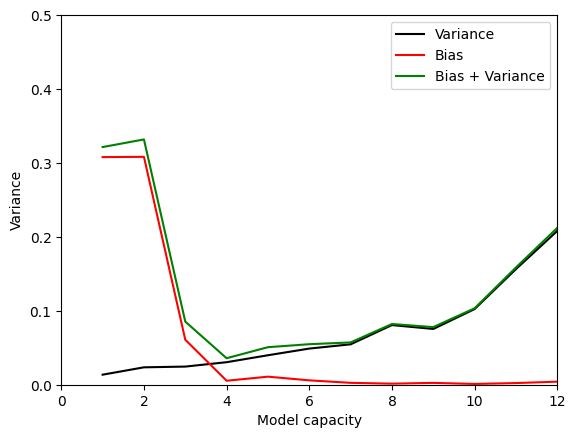

In [123]:
# In previous case, we generated 100 datasets of 15 data points. We will do the same except this time we
# will vary number of hidden neurons in them from 1-12 which was fixed to 5 previously.

# Plot the noise, bias and variance as a function of capacity
hidden_variables = [1,2,3,4,5,6,7,8,9,10,11,12]
bias = np.zeros((len(hidden_variables),1)) ;
variance = np.zeros((len(hidden_variables),1)) ;

n_datasets = 100
n_data = 15
sigma_func = 0.3

# Set random seed so that we get the same result every time
np.random.seed(1)

for c_hidden in range(len(hidden_variables)):
  # Get mean and variance of fitted model
  mean_model, std_model = get_model_mean_variance(n_data, n_datasets, hidden_variables[c_hidden], sigma_func) ;
  # TODO

  variance[c_hidden] = np.mean(np.square(std_model))
  bias[c_hidden] = np.mean(np.square(np.subtract(y_func, mean_model)))






  # END TODO

# Plot the results
fig,ax = plt.subplots()
ax.plot(hidden_variables, variance, 'k-')
ax.plot(hidden_variables, bias, 'r-')
ax.plot(hidden_variables, variance+bias, 'g-')
ax.set_xlim(0,12)
ax.set_ylim(0,0.5)
ax.set_xlabel("Model capacity")
ax.set_ylabel("Variance")
ax.legend(['Variance', 'Bias', 'Bias + Variance'])
plt.show()


If code for previous task is correct then your graph will look like this.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1rzvzuj1u6igNlh3U7dDLxlKmMui7mklB)
</center>
